In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# Домашнее задание по курсу анализа данных
Версия от 11.12.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 18.12.2021  23:59**

**Жесткий дедлайн: 20.12.2021  8:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? Если есть удалить.
* Найти и удалить выбросы по признаку `home_cost`. (Их не больше 15-х, не меньше 3-х)

In [4]:
data

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
...,...,...,...,...,...,...,...,...,...
495,1,0.0,3.589436e+07,1,3.0,Executive,1.007038e+07,1.0,0.599222
496,1,3.0,2.454208e+06,0,20.0,Homemaker,1.009348e+07,1.0,0.259710
497,1,0.0,3.335405e+06,0,17.0,Healthcare,1.016696e+07,0.0,0.258779


В первую очередь в глаза бросается акая-то беда с индексами. Исправим это:

In [6]:
data = data.reset_index(drop=True)
data

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
...,...,...,...,...,...,...,...,...,...
5995,1,0.0,3.589436e+07,1,3.0,Executive,1.007038e+07,1.0,0.599222
5996,1,3.0,2.454208e+06,0,20.0,Homemaker,1.009348e+07,1.0,0.259710
5997,1,0.0,3.335405e+06,0,17.0,Healthcare,1.016696e+07,0.0,0.258779
5998,0,1.0,2.024255e+08,0,10.0,Lawyer,1.025544e+07,NaN,0.212931




---

Посмотрим на дубли:

In [8]:
data.loc[data.duplicated()]

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness


Выходит, дублей нет.



---

Поищем выбросы по признаку home_cost:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


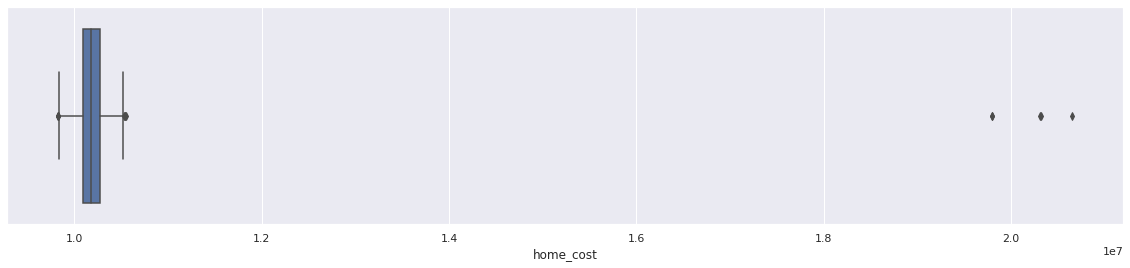

In [18]:
sns.set(rc={"figure.figsize":(20, 4)})
sns.boxplot(data['home_cost']);

In [31]:
ql = data['home_cost'].quantile(0.05)
qu = data['home_cost'].quantile(0.95)
q1 = data['home_cost'].quantile(0.25)
q3 = data['home_cost'].quantile(0.75)
iqr = q3 - q1
hc_anomaly = (data['home_cost'] < q1-1.5*iqr ) | (data['home_cost'] > q3+1.5*iqr)
data[hc_anomaly]['home_cost']

173     9.824378e+06
714     1.054213e+07
1140    2.032128e+07
1779    2.031197e+07
1825    1.054779e+07
2070    9.824841e+06
2966    1.053073e+07
3307    1.979488e+07
3380    1.979532e+07
3912    1.054311e+07
4014    9.827240e+06
4727    2.065792e+07
5673    9.824378e+06
Name: home_cost, dtype: float64

In [34]:
data[hc_anomaly]['home_cost'].count()  # Количество выбросов:

13

Я заметил, что в выбросах есть дупликаты:

In [35]:
data[hc_anomaly]['home_cost'].loc[data[hc_anomaly]['home_cost'].duplicated()]

5673    9.824378e+06
Name: home_cost, dtype: float64

Удаляем выбросы:

In [43]:
data = data.drop(hc_anomaly[hc_anomaly].index).reset_index(drop=True)

In [45]:
data.shape

(5987, 9)

# Проверка гипотез (15 баллов)

<div class="alert alert-info">

<b>Описание заданий раздела:</b>    
    
В этом разделел вам предстоит:
* Проверить предложенные утверждения визуально.
* Применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных.

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

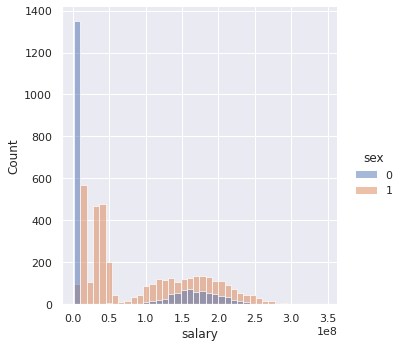

In [48]:
 # YOUR CODE
sns.displot(data, x="salary", bins=40, hue="sex");

Я бы сходу сказал, что это неправда, но вроде это не так очевидно.
Попробуем в этом убедиться:






In [52]:
data.loc[(data['sex'] == 1), 'salary'].mean() - data.loc[(data['sex'] == 0), 'salary'].mean()  # Разница между средней зарплатой мужчин и женщин (в таком именно порядке)

40685170.572914064

In [53]:
scipy.stats.ttest_ind(data.loc[(data['sex'] == 1), 'salary'], data.loc[(data['sex'] == 0), 'salary'])

Ttest_indResult(statistic=19.120734501379925, pvalue=3.7404230251868476e-79)

Теперь же это можно сказать уверенно: среднаяя зарплата мужчин выше, чем у женщин, при этом p-value для гипотезы о равенстве этих зарплат близится к нулю.

Поэтому *предположение неверно*.


---


<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

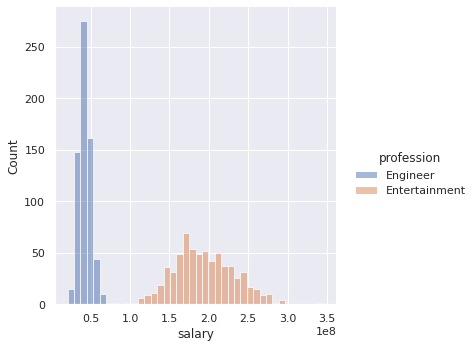

In [57]:
 # YOUR CODE
sns.displot(data.loc[data['profession'].isin(['Engineer','Entertainment'])], bins=40, x='salary', hue='profession');

Ну здесь-то уж точно можно сразу сказать, что *гипотеза неверна*.

---

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

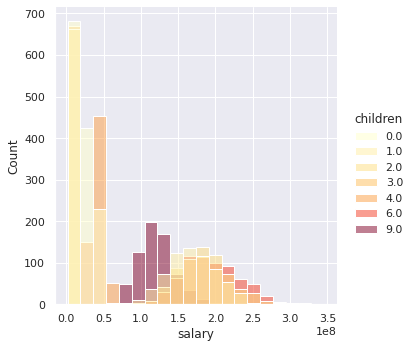

In [70]:
 # YOUR CODE
sns.displot(data, bins=20, x='salary', hue='children', palette='YlOrRd');

In [71]:
data.loc[(data['children'] > 3), 'salary'].mean() - data.loc[(data['children'] <= 3), 'salary'].mean()

51802947.14064382

In [72]:
scipy.stats.ttest_ind(data.loc[(data['children'] > 3), 'salary'], data.loc[(data['children'] <= 3), 'salary'])

Ttest_indResult(statistic=24.713318726825975, pvalue=1.7626205893564625e-128)

С помощью рассуждения, аналогичному приведённому в 1-ом пункте, делаем вывод, что *гипотеза верна*.

---



<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

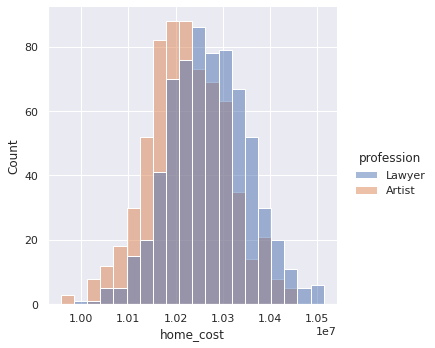

In [79]:
# YOUR CODE
sns.displot(data.loc[data['profession'].isin(['Artist', 'Lawyer'])], bins=20, x='home_cost', hue='profession');

На самом деле, уже кажется, что гипотеза верна, но это может быть обманчивым ощущением, обсуловленным недостаточным количествов бинов. 

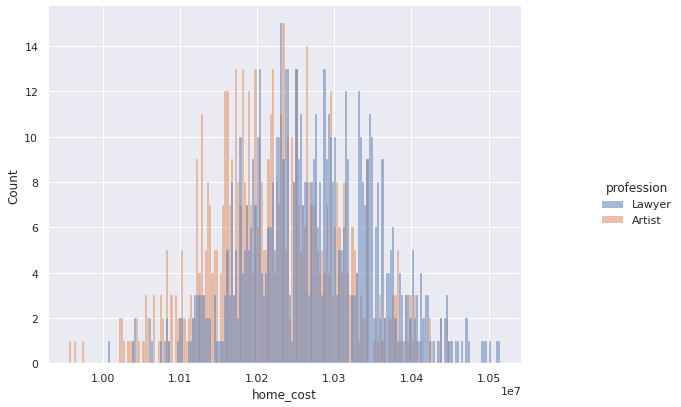

In [84]:
g = sns.displot(data.loc[data['profession'].isin(['Artist', 'Lawyer'])], bins=200, x='home_cost', hue='profession')
g.figure.set_figwidth(10)
g.figure.set_figheight(6)

In [85]:
data.loc[(data['profession'] == 'Artist'), 'home_cost'].mean() - data.loc[(data['profession'] == 'Lawyer'), 'home_cost'].mean()

-47873.61956227012

In [86]:
scipy.stats.ttest_ind(data.loc[(data['profession'] == 'Artist'), 'home_cost'], data.loc[(data['profession'] == 'Lawyer'), 'home_cost'])

Ttest_indResult(statistic=-10.312443126358481, pvalue=4.808361776857856e-24)

Что и требовалось докзать: *гипотеза верна*.


---


<div class="alert alert-warning">
    
* Прада ли, что недвижимость у бывавших в браке в среднем дороже, чем у не бывавших в браке?

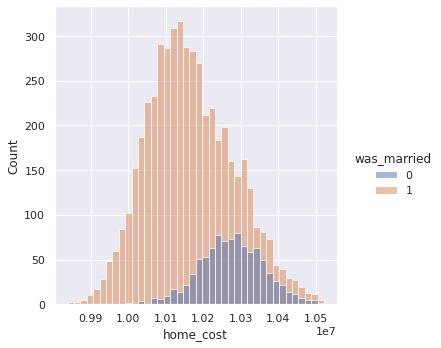

In [89]:
# YOUR CODE
sns.displot(data, bins=40, x='home_cost', hue='was_married');

На первый взгляд кажется, что гипотеза неверна.

In [90]:
data.loc[(data['was_married'] == 1), 'home_cost'].mean() - data.loc[(data['was_married'] == 0), 'home_cost'].mean()

-110061.13370857015

In [91]:
scipy.stats.ttest_ind(data.loc[(data['was_married'] == 1), 'home_cost'], data.loc[(data['was_married'] == 0), 'home_cost'])

Ttest_indResult(statistic=-27.941160137149478, pvalue=1.3606516362213319e-161)

*Гипотез неверна.*

---

<div class="alert alert-warning">
    
* Прада ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - воспользуйтесь критерием хи-квадрат из библиотеки scipy

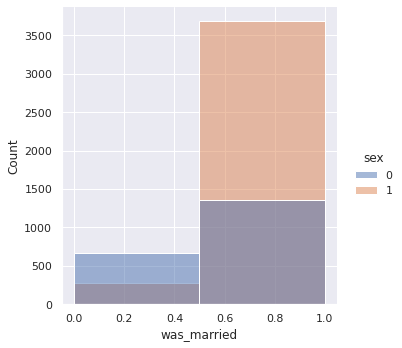

In [95]:
# YOUR CODE
sns.displot(data, bins=2, x='was_married', hue='sex');

In [98]:
scipy.stats.ttest_ind(data.loc[(data['sex'] == 1), 'was_married'], data.loc[(data['sex'] == 0), 'was_married'])

Ttest_indResult(statistic=27.758146812695955, pvalue=1.2469686465542237e-159)

Видим, что отношение правого рыжего столбца к левому сильно больше отношения правого синего столбца к левому, то есть количество мужчин, вступающих в брак, больше соответствующего количества женщин. 

На онсове этого я бы сразу сделал вывод, что *гипотеза верна.*

# Гипотезы при множественном тестировании (10 баллов)

In [ ]:
# Подсказка: 
# - дисперсионнай анализ  f_oneway()
# - Крускал Уоллиса

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

In [ ]:
# YOUR CODE

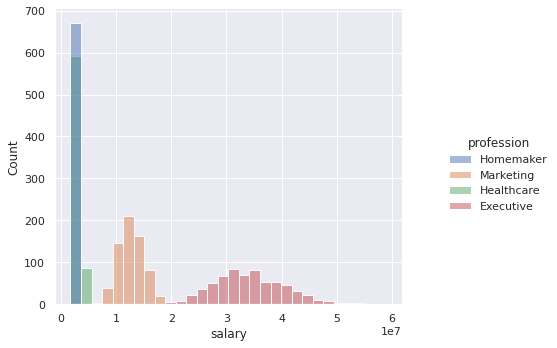

In [101]:
HMHE = data['profession'].isin(['Homemaker', 'Marketing', 'Healthcare','Executive'])
g1 = sns.displot(data[HMHE], bins=30, x='salary', hue='profession');
g1.figure.set_figwidth(8)

Если ситуация с профессиями Marketing и Executive очевидна, то стоит внимательнее расммотреть этот график для профессий Homemaker и Healthcare:

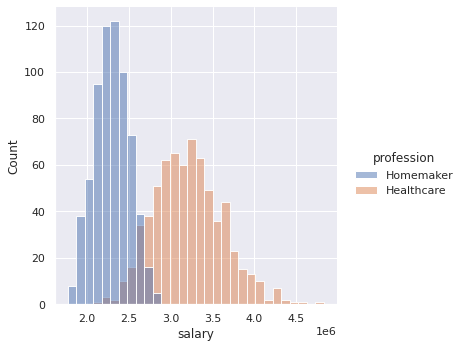

In [102]:
HoHe = data['profession'].isin(['Homemaker', 'Healthcare'])
sns.displot(data[HoHe], bins=30, x='salary', hue='profession');

In [105]:
data_ho = data.loc[data['profession'] == 'Homemaker', 'salary'].values
data_he = data.loc[data['profession'] == 'Healthcare', 'salary'].values

scipy.stats.f_oneway(data_ho, data_he)

F_onewayResult(statistic=2597.917217734768, pvalue=1.0835895e-316)

Делаем вывод, что *гипотеза неверна.*

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

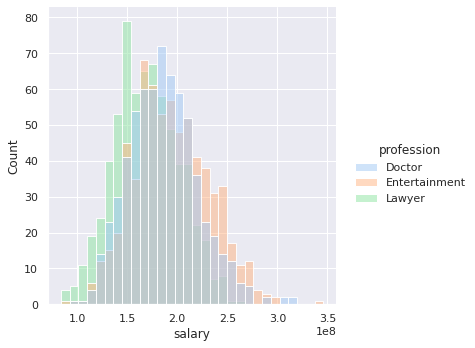

In [113]:
# YOUR CODE
DEL = data['profession'].isin(['Doctor', 'Entertainment', 'Lawyer'])
sns.displot(data[DEL], bins=30, x='salary', hue='profession', palette='pastel');

In [114]:
data_d = data.loc[data['profession'] == 'Doctor', 'salary'].values
data_e = data.loc[data['profession'] == 'Entertainment', 'salary'].values
data_l = data.loc[data['profession'] == 'Lawyer', 'salary'].values

scipy.stats.f_oneway(data_d, data_e, data_l)

F_onewayResult(statistic=88.92649642294666, pvalue=1.023070527084598e-37)

*Гипотеза неверна,* хотя и порядок малости p-value отличается от соответсвуещего в прошлом пункте на порядок (порядок по порядок a.k.a. розовые розы). Собственно, и график не позволял сделать очевидного вывода, нежели в предыдущем пункте.

# Регрессионный Анализ (20 баллов)

Взглянем от чего зависит уровень счастья

In [116]:
import statsmodels.formula.api as smf;

# Рекомендации: 
# Используйте библиотку statsmodels для оценки вклада каждого фактора
# Выведения отчета о модели - model.summary()

<div class="alert alert-warning">
    
Выполните следующие задания и на основе результатов ответьте на вопросы:

* Постройте регрессионную модель зависимости уровня счастья от приведенных факторов (was_married, children, salary, sex, age, home_cost)
* Существует ли связь между уровнем счастья и зарплатой?

* Насколько сильны эти отношения?

* Как факт брака способствуют стоимости недвижимости?

* Зная влияние каждого фактора, можем ли мы предсказать уровень счастья?

* Постройте график зависимостей целевой переменной от приведенных числовых факторов. 
    
* Какие признаки не влияют на уровень счастья? (стат. значимость)
    
* Какой признак самый сильный?
    
* Постройте график остатков. Всю ли информацию смогла извлечь ваша модель из данных?

* Наблюдается ли гетероскедастичность в остатках?
    
* Есть ли в данных автокоррелированность?  

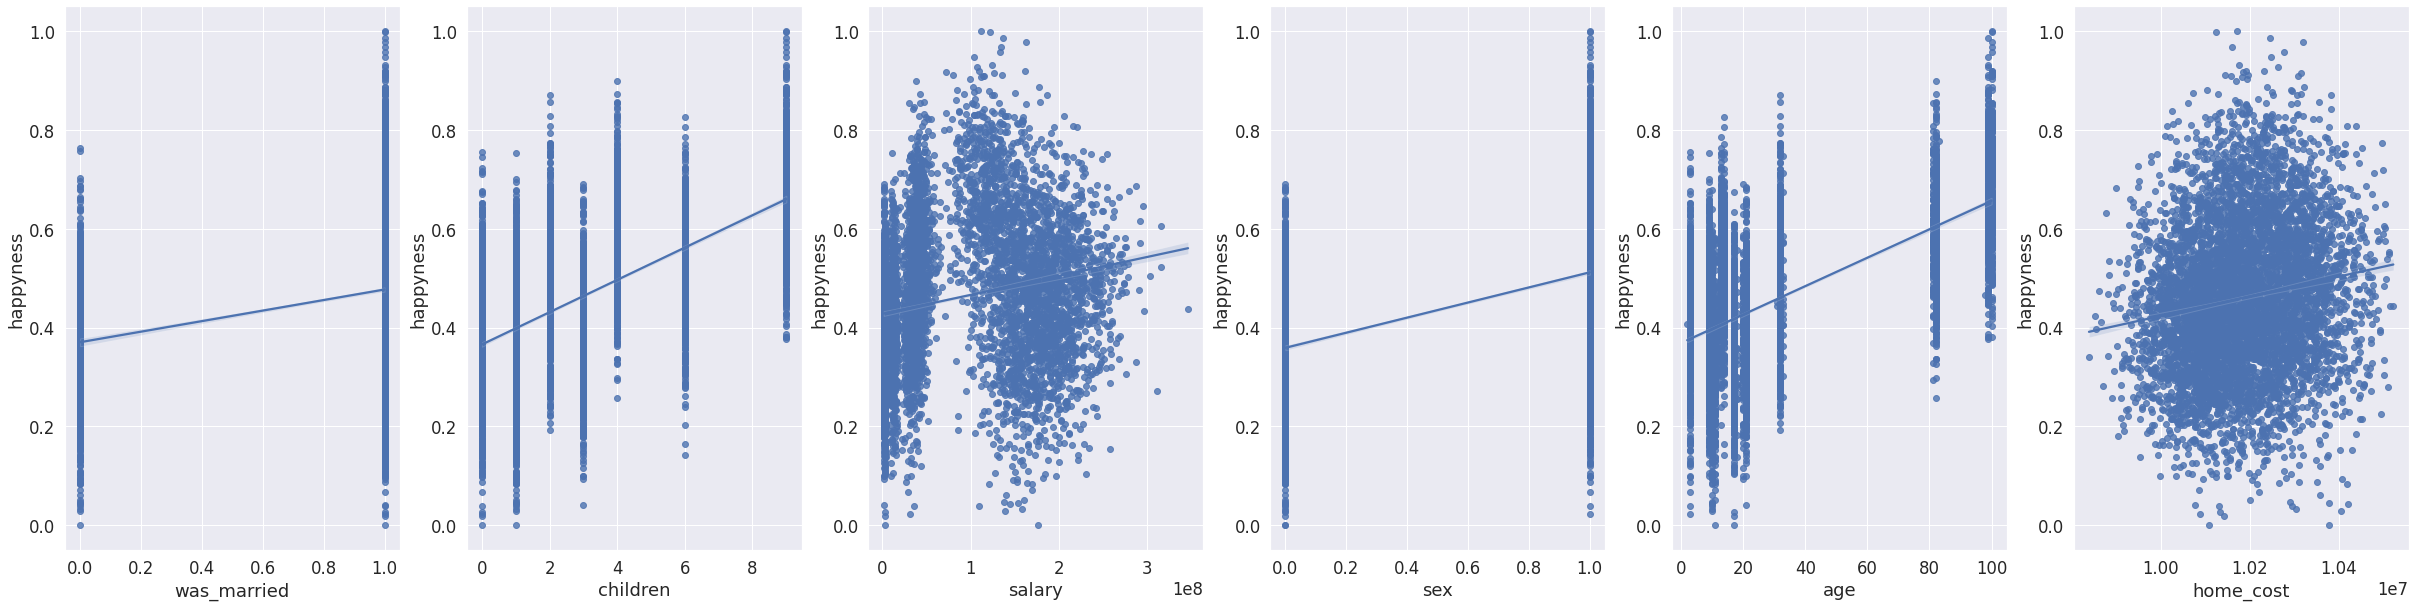

In [133]:
cols = ['was_married', 'children', 'salary', 'sex', 'age', 'home_cost']
fig, ax = plt.subplots(6, figsize=(42, 10))
sns.set(font_scale=1.5)
fig.subplots_adjust(wspace=0.2)
for i in range(6):
    plt.subplot(1, 6, i+1)
    sns.regplot(data=data, x=data[cols[i]], y='happyness')
plt.show()

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**